# **Data Science Engineering Methods And Tools**
# **AUTOML**

**Abstract:**In this project I have used body building supplement and Nutrition products dataset. Th main goal is to predict the price per serving of the supplement.

**Data Set**

The data set consists of :

14 physical characteristics i.e. average flavor rating, brand name, link, number of flavors, number of reviews, overall rating, price, product category, product_description, product name top flavor rated, verified buyer number, verified buyer rating - The independent variable

Price per serving- The target variable There are a total of 840 rows and 14 columns

**Variable Description:**
**average_flavor_rating :** The average of the flavor rated by the user

**brand_name :** The name of the brand

**link :** The link of the product

**number_of_flavors :** The total number of flavors that brand has

**number_of_reviews :** The total number of reviews for a product

**overall_rating :** The overall rating of the product

**price :** The actual price of the product

**price_per_serving :** The cost of the supplement per serving

**product_category :** The category of the supplement

**product_description :** The description of the product

**product_name :** The name of the product

**top_flavor_rated :** Top flavor of a particular supplement

**verified_buyer_number :** The number of the verified buyer

**verified_buyer_rating :** The rating of the verified buyer


In [381]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [382]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (18, 9)})

In [383]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 hours 47 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_or4nv2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [384]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [385]:
#psutil library to gather information about the system's virtual memory and uses that information to calculate a minimum memory size.
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [386]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:38281..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpia65t5jr
  JVM stdout: /tmp/tmpia65t5jr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpia65t5jr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:38281
Connecting to H2O server at http://127.0.0.1:38281 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_28826e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing Data

In [387]:
pandas_df = pd.read_csv("https://raw.githubusercontent.com/sameernimse09/Data-Science/main/bodybuilding_nutrition_products.csv") 
# Reading CSV file into Pandas DataFrame

In [388]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_flavor_rating  387 non-null    float64
 1   brand_name             840 non-null    object 
 2   link                   840 non-null    object 
 3   number_of_flavors      381 non-null    float64
 4   number_of_reviews      821 non-null    float64
 5   overall_rating         821 non-null    float64
 6   price                  840 non-null    float64
 7   price_per_serving      840 non-null    float64
 8   product_category       669 non-null    object 
 9   product_description    840 non-null    object 
 10  product_name           840 non-null    object 
 11  top_flavor_rated       381 non-null    object 
 12  verified_buyer_number  509 non-null    object 
 13  verified_buyer_rating  509 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [389]:
pandas_df.isnull().sum()
# Checking for any null values in the dataset

average_flavor_rating    453
brand_name                 0
link                       0
number_of_flavors        459
number_of_reviews         19
overall_rating            19
price                      0
price_per_serving          0
product_category         171
product_description        0
product_name               0
top_flavor_rated         459
verified_buyer_number    331
verified_buyer_rating    331
dtype: int64

In [390]:
pandas_df.shape  # Shape of the dataframe - Here, we have 840 samples of data


(840, 14)

In [391]:
pandas_df.head()  # Sample of how our data looks

,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.1,EVLUTION NUTRITION,https://sa.bodybuilding.com/store/evlution-nut...,29.0,2575.0,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.4,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/whey.htm...,43.0,9926.0,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.3,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pre-jym....,9.0,3947.0,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,NaN,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/essentia...,NaN,2466.0,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,NaN,NaN,NaN
4,8.7,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pro-jym....,14.0,2506.0,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0


In [392]:
columns = list(pandas_df.columns)
print(columns)  # Name of all predictors and result

['average_flavor_rating', 'brand_name', 'link', 'number_of_flavors', 'number_of_reviews', 'overall_rating', 'price', 'price_per_serving', 'product_category', 'product_description', 'product_name', 'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating']


In [393]:
pandas_df.describe()  # Statistical description of our dataset

,average_flavor_rating,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,verified_buyer_rating
count,387.000000,381.000000,821.000000,821.000000,840.000000,840.000000,509.000000
mean,8.666150,6.288714,483.512789,8.950914,30.292274,1.033310,7.854617
std,0.944176,7.094891,1124.738416,0.732080,17.358937,0.862362,2.057845
min,1.000000,1.000000,1.000000,1.000000,2.490000,0.020000,1.000000
25%,8.300000,2.000000,24.000000,8.600000,17.985000,0.430000,8.000000
50%,8.800000,4.000000,95.000000,9.100000,27.990000,0.830000,8.000000
75%,9.200000,8.000000,403.000000,9.400000,37.990000,1.330000,9.000000
max,10.000000,43.000000,9926.000000,10.000000,119.530000,7.990000,9.000000


This table shows summary statistics for a dataset with 840 observations and 14 variables.

The variables are: average flavor rating, brand name, link, number of flavors, number of reviews, overall rating, price, product category, product_description, product name top flavor rated, verified buyer number, verified buyer rating, price per serving

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

# Data Cleaning

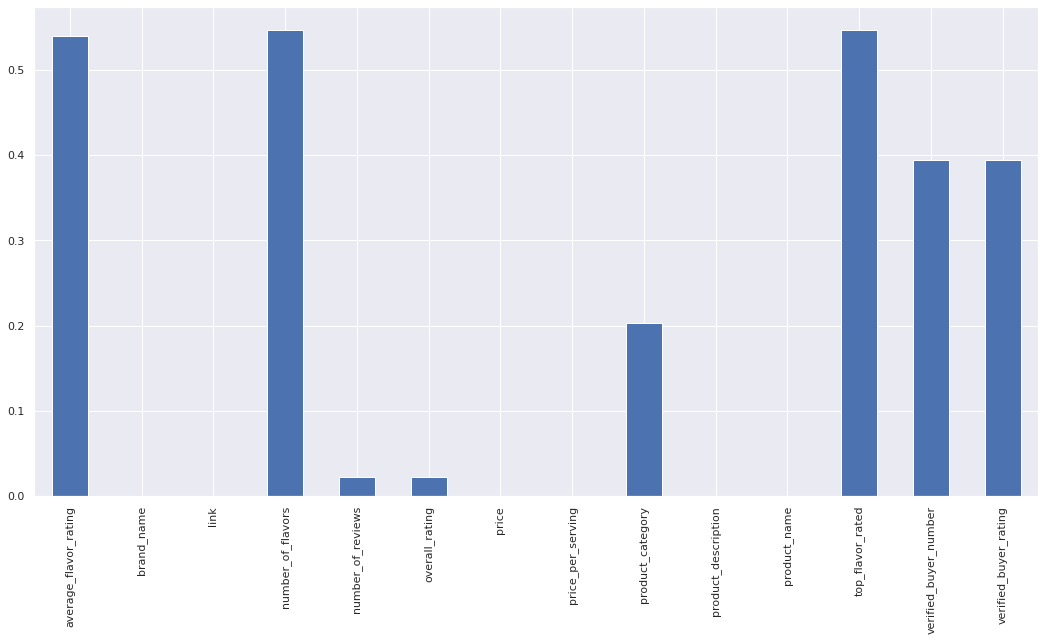

Features with Missing Data:
Index(['average_flavor_rating', 'number_of_flavors', 'number_of_reviews',
       'overall_rating', 'product_category', 'top_flavor_rated',
       'verified_buyer_number', 'verified_buyer_rating'],
      dtype='object')
Percentage of Missing Data:
average_flavor_rating    0.539286
number_of_flavors        0.546429
number_of_reviews        0.022619
overall_rating           0.022619
product_category         0.203571
top_flavor_rated         0.546429
verified_buyer_number    0.394048
verified_buyer_rating    0.394048
dtype: float64


In [394]:
import pandas as pd
import numpy as np

# Find the percentage of missing data for each column
missing_data = pandas_df.isnull().mean()

# Plot the percentage of missing data
missing_data.plot(kind='bar')
plt.show()

# Select the columns with missing data
selected_features = missing_data[missing_data > 0].index

print("Features with Missing Data:")
print(selected_features)

print("Percentage of Missing Data:")
print(missing_data[selected_features])

# Null Values Imputation

In [395]:
#Imputing using the Mode function for categorical data

pandas_df['product_category'] = pandas_df['product_category'].fillna(pandas_df['product_category'].mode()[0])
pandas_df['top_flavor_rated'] = pandas_df['top_flavor_rated'].fillna(pandas_df['top_flavor_rated'].mode()[0])
pandas_df['verified_buyer_number'] = pandas_df['verified_buyer_number'].fillna(pandas_df['verified_buyer_number'].mode()[0])


# Imputing the NULL Values in a column for using the Mean function
pandas_df['average_flavor_rating'] = pandas_df['average_flavor_rating'].fillna((pandas_df['average_flavor_rating'].mean()))
pandas_df['number_of_flavors'] = pandas_df['number_of_flavors'].fillna((pandas_df['number_of_flavors'].mean()))

#Imputing using padding

pandas_df['verified_buyer_rating'].fillna(method='pad', inplace=True)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data using the imputer

pandas_df['number_of_reviews'] = imputer.fit_transform(pandas_df['number_of_reviews'].values.reshape(-1, 1))
pandas_df['overall_rating'] = imputer.fit_transform(pandas_df['overall_rating'].values.reshape(-1, 1))

# Label Encoder

In [396]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

print (label_encoder)

pandas_df["brand_name"] = label_encoder.fit_transform(pandas_df["brand_name"])

pandas_df.head()

LabelEncoder()


,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.10000,26,https://sa.bodybuilding.com/store/evlution-nut...,29.000000,2575.0,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.40000,62,https://sa.bodybuilding.com/store/opt/whey.htm...,43.000000,9926.0,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.30000,36,https://sa.bodybuilding.com/store/jym/pre-jym....,9.000000,3947.0,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,8.66615,62,https://sa.bodybuilding.com/store/opt/essentia...,6.288714,2466.0,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,Unflavored,1,9.0
4,8.70000,36,https://sa.bodybuilding.com/store/jym/pro-jym....,14.000000,2506.0,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0


In [397]:
#Checking for null values
pandas_df.isnull().sum().sum()

0

In [398]:
pandas_df.describe()

,average_flavor_rating,brand_name,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,verified_buyer_rating
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,8.666150,42.976190,6.288714,483.512789,8.950914,30.292274,1.033310,7.786905
std,0.640421,24.413832,4.774815,1111.930069,0.723743,17.358937,0.862362,2.160115
min,1.000000,0.000000,1.000000,1.000000,1.000000,2.490000,0.020000,1.000000
25%,8.666150,24.000000,5.000000,26.000000,8.600000,17.985000,0.430000,8.000000
50%,8.666150,48.000000,6.288714,98.000000,9.100000,27.990000,0.830000,8.000000
75%,8.700000,62.000000,6.288714,453.250000,9.400000,37.990000,1.330000,9.000000
max,10.000000,92.000000,43.000000,9926.000000,10.000000,119.530000,7.990000,9.000000


<AxesSubplot:>

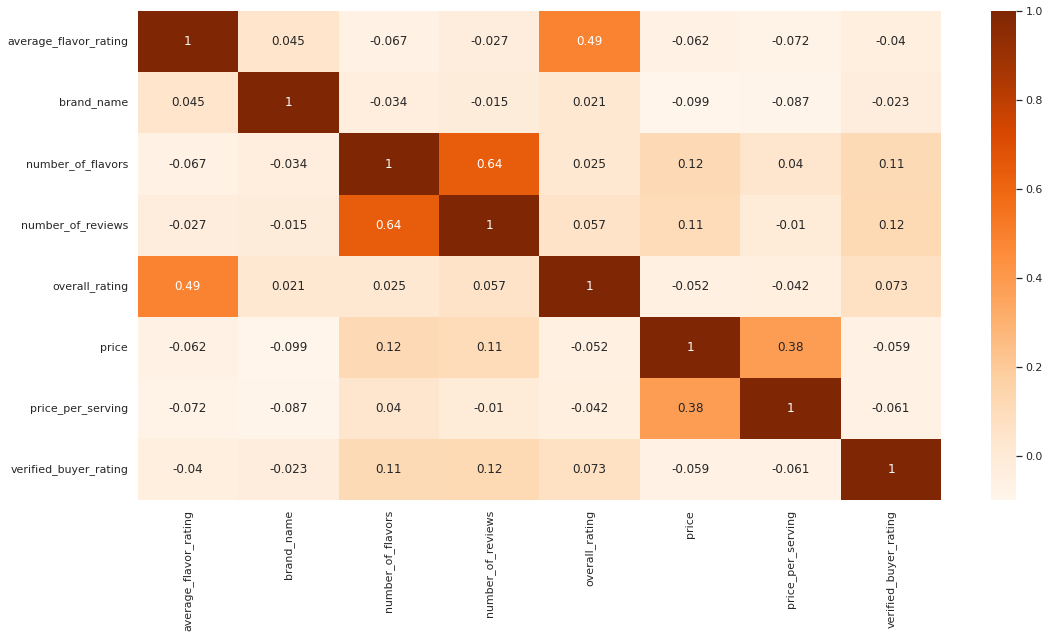

In [399]:
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes

# **Correlation Analysis**

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

From the Above Matrix we can conclude a few things

- Number of reviews and verified buyer rating are highly correlated
- Number of flavors and verfied buyer number are highlt correlated

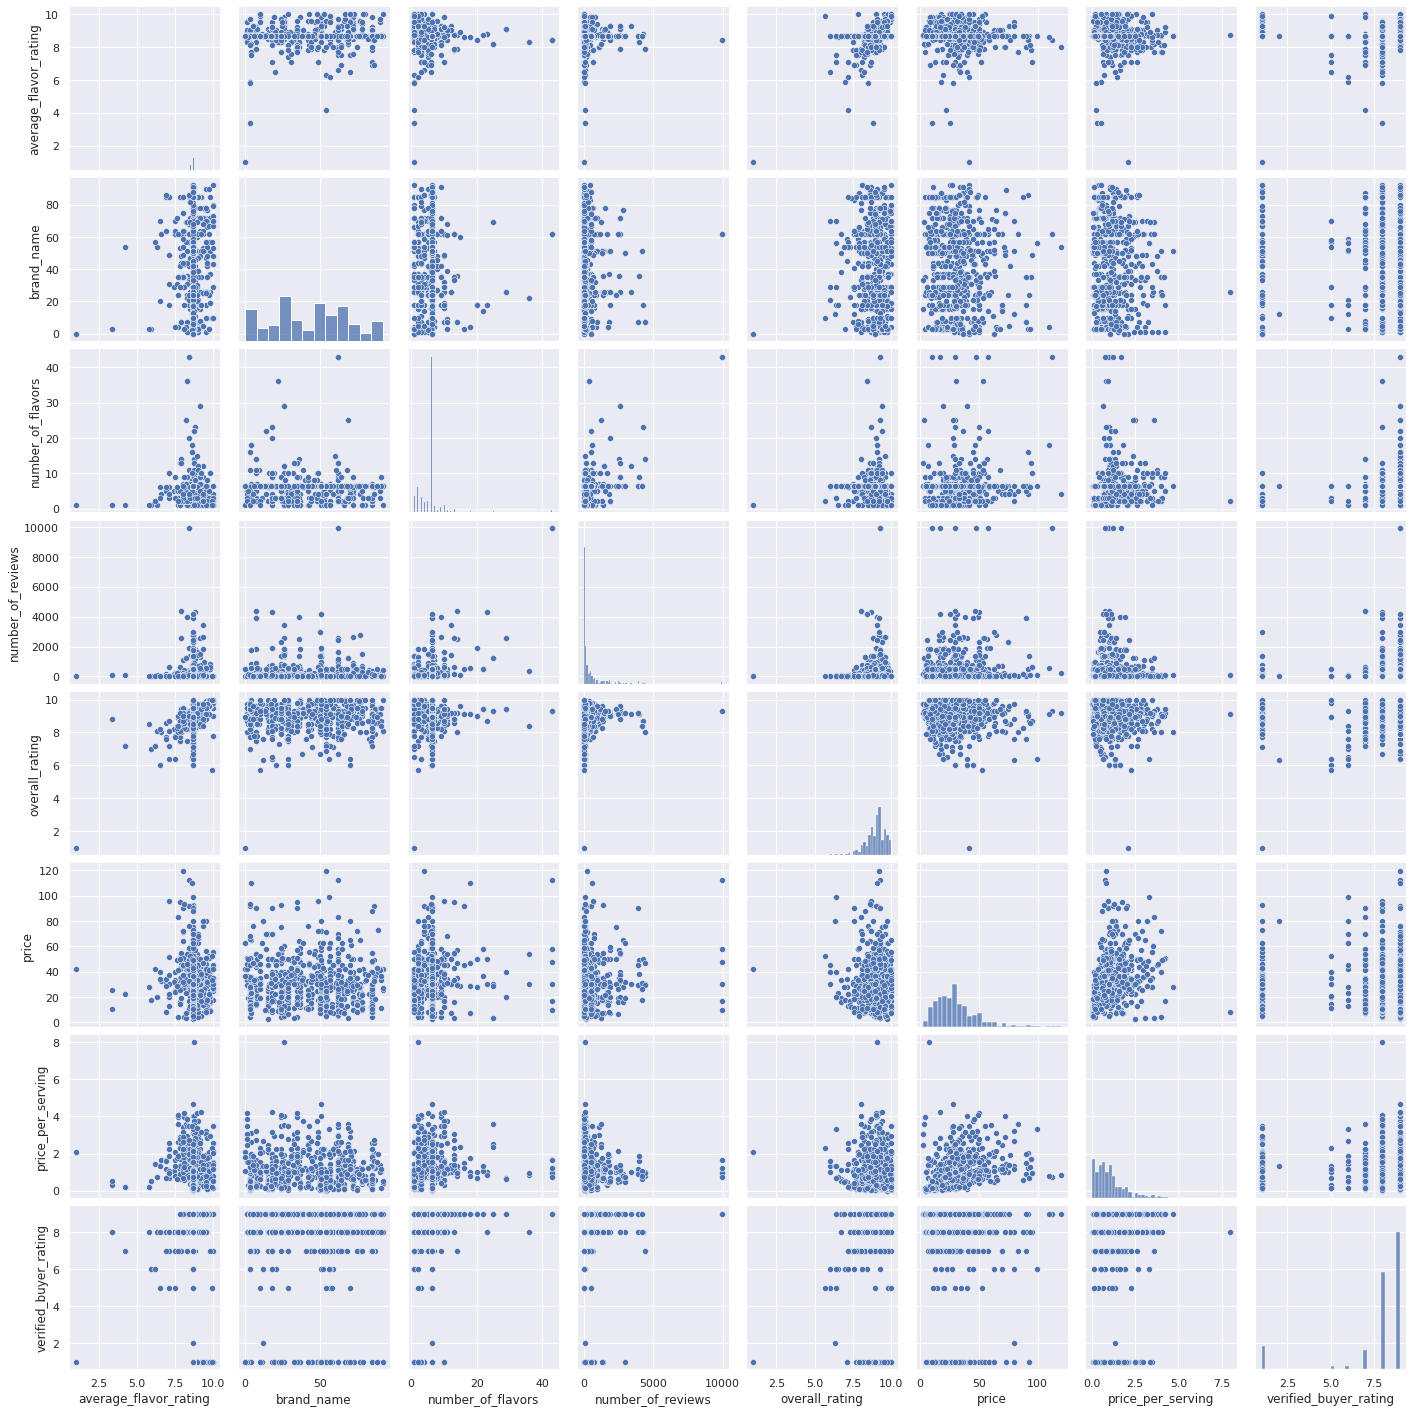

In [400]:
sns.pairplot(pandas_df)  # All attributes are plotted against each other to see the pattern of distribution

# **Interpreting PairPlot**

* A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

* Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

* Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

* Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

* Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

* Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.



/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

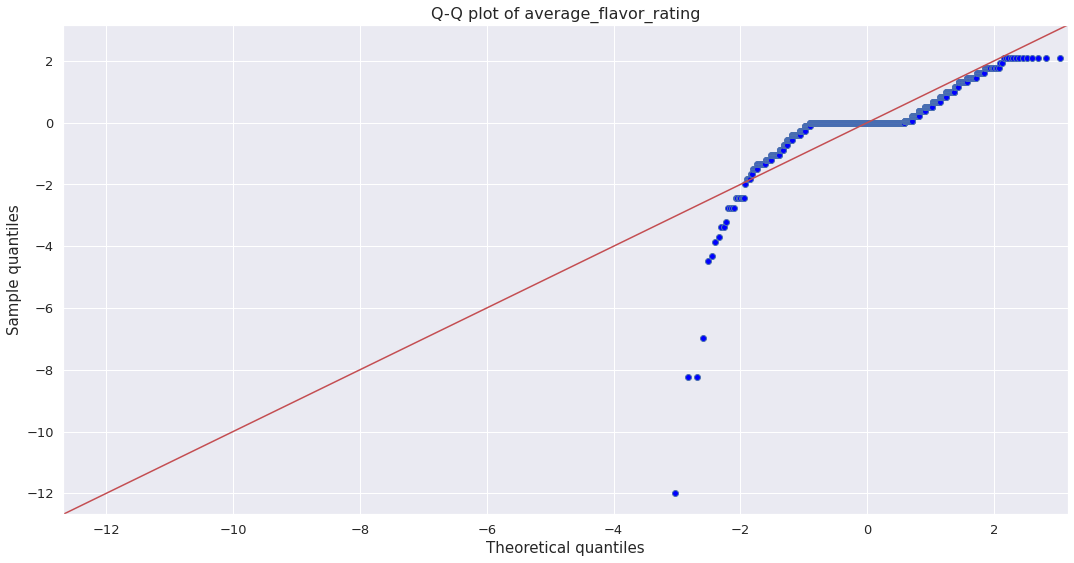

<Figure size 576x360 with 0 Axes>

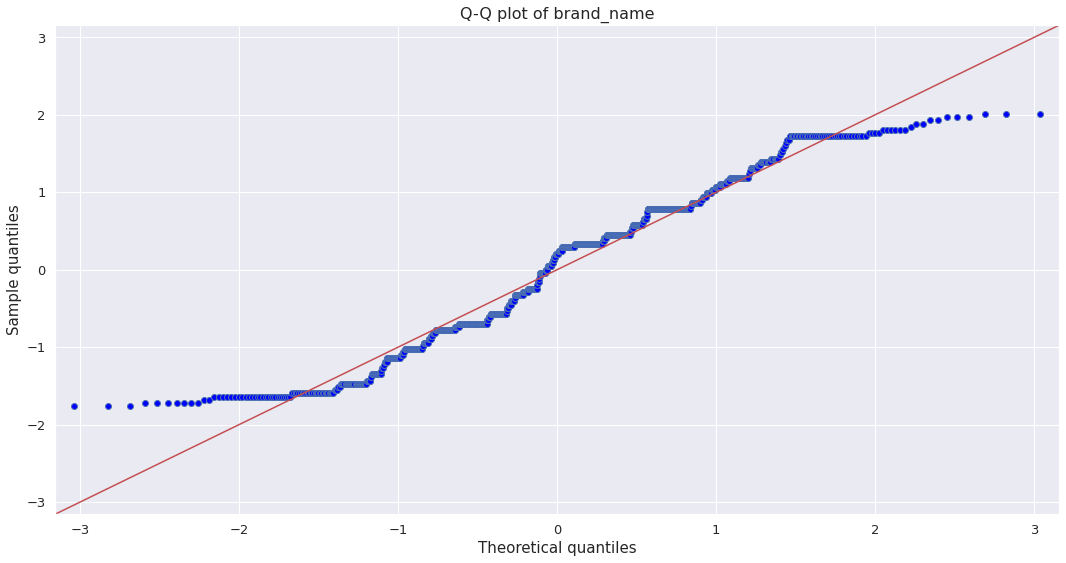

<Figure size 576x360 with 0 Axes>

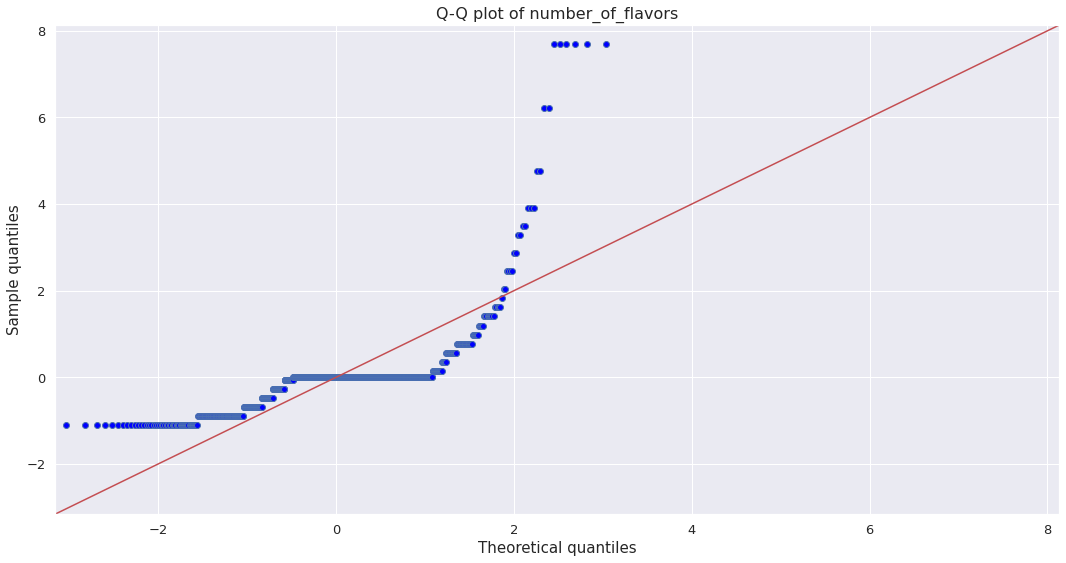

<Figure size 576x360 with 0 Axes>

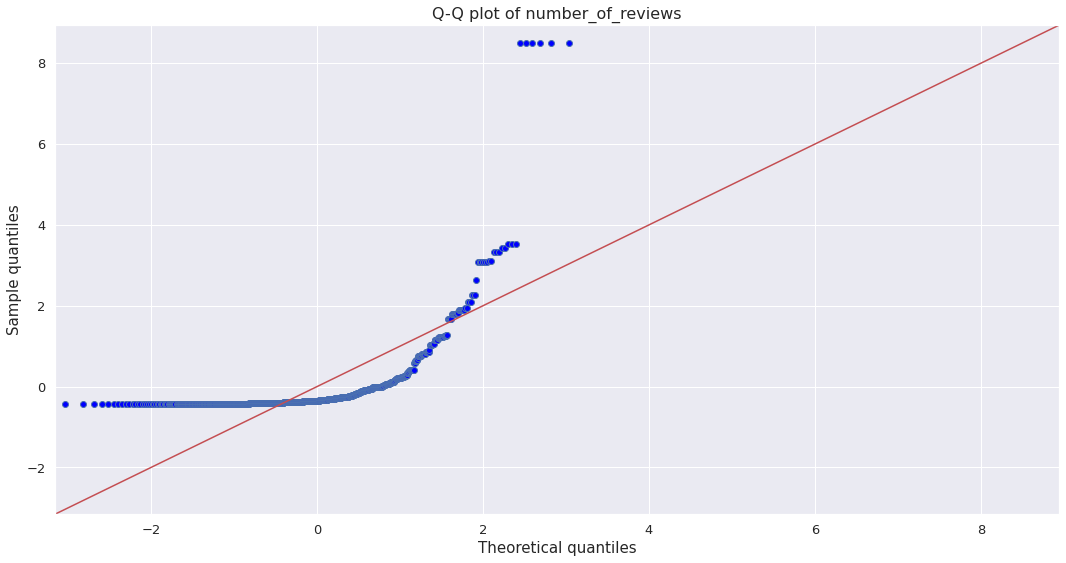

<Figure size 576x360 with 0 Axes>

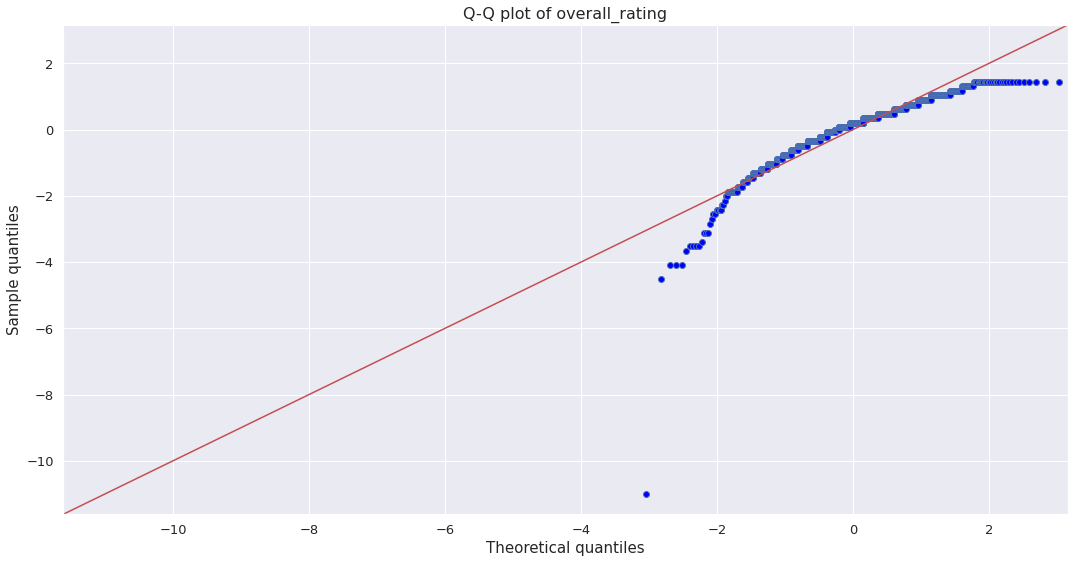

<Figure size 576x360 with 0 Axes>

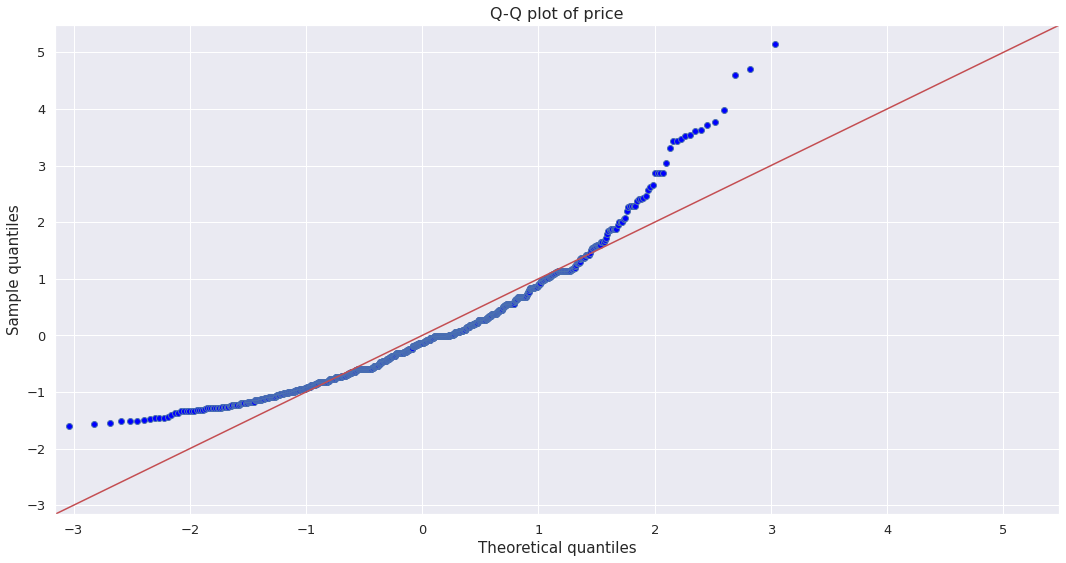

<Figure size 576x360 with 0 Axes>

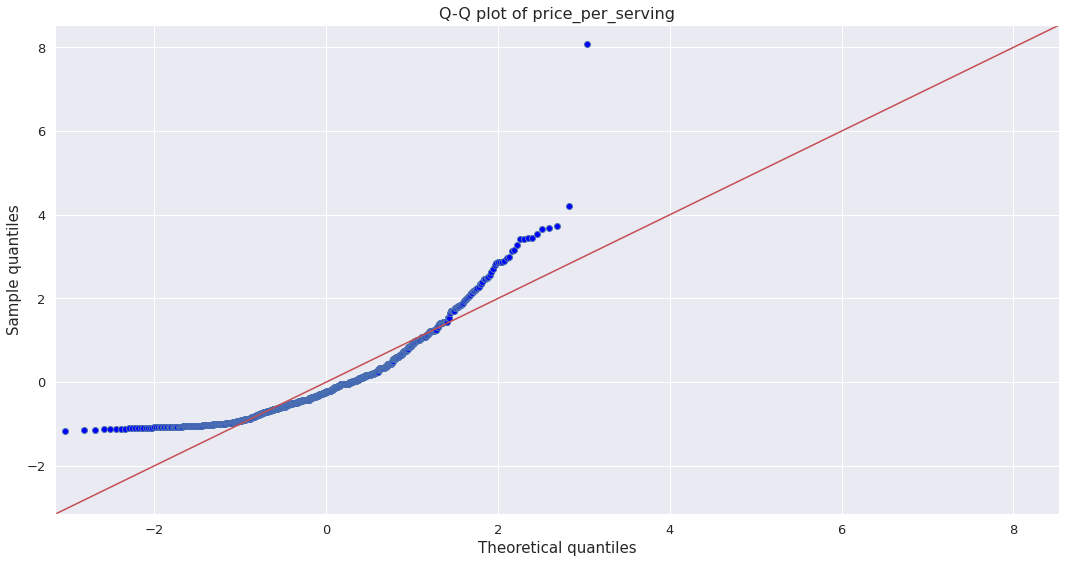

<Figure size 576x360 with 0 Axes>

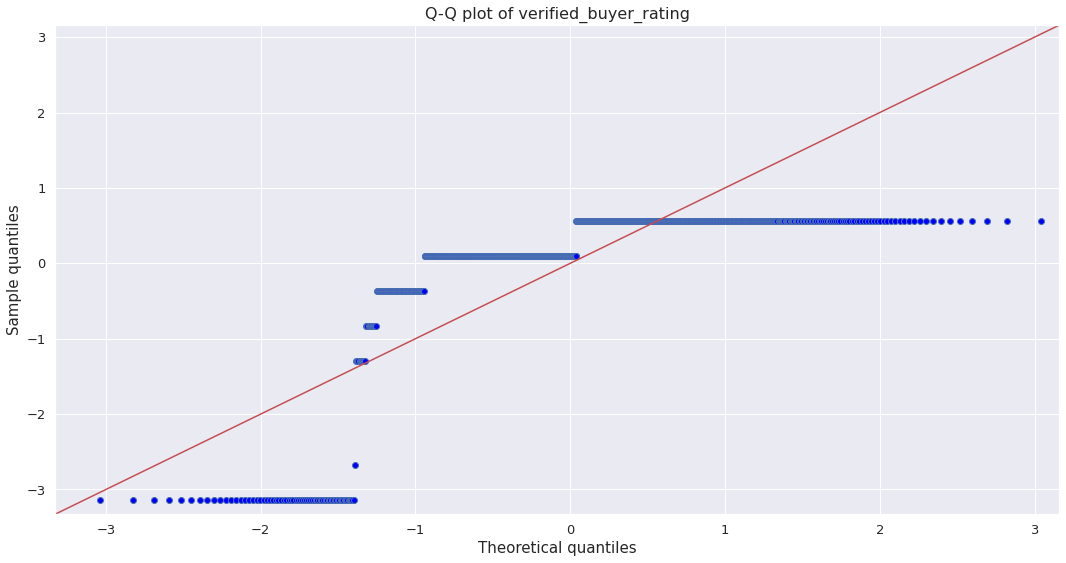

In [401]:
from statsmodels.graphics.gofplots import qqplot
data_norm=pandas_df[['average_flavor_rating', 'brand_name', 'number_of_flavors', 'number_of_reviews',
       'overall_rating','price','price_per_serving','verified_buyer_rating']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



1.   Average Flavor Rating: The distribution of average flavor rating is skewed towards right
2.   Brand Name:The distribution of brand name is normal
3.   Number of Flavors:  The distribution of number of flavors is skewed towards left
4.  Number of Reviews: The distribution of number of reviews is skewed towards left
5.  Overall rating: The distribution of overall rating is skewed towards right
6.  Price: The distribution of price is normal
7.  Price per serving: The distribution of price per serving is skewed towards left
8. Verified Buyer Rating: The distribution of verified buyer rating is 


array([[<AxesSubplot:title={'center':'average_flavor_rating'}>,
        <AxesSubplot:title={'center':'brand_name'}>,
        <AxesSubplot:title={'center':'number_of_flavors'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'price_per_serving'}>,
        <AxesSubplot:title={'center':'verified_buyer_rating'}>,
        <AxesSubplot:>]], dtype=object)

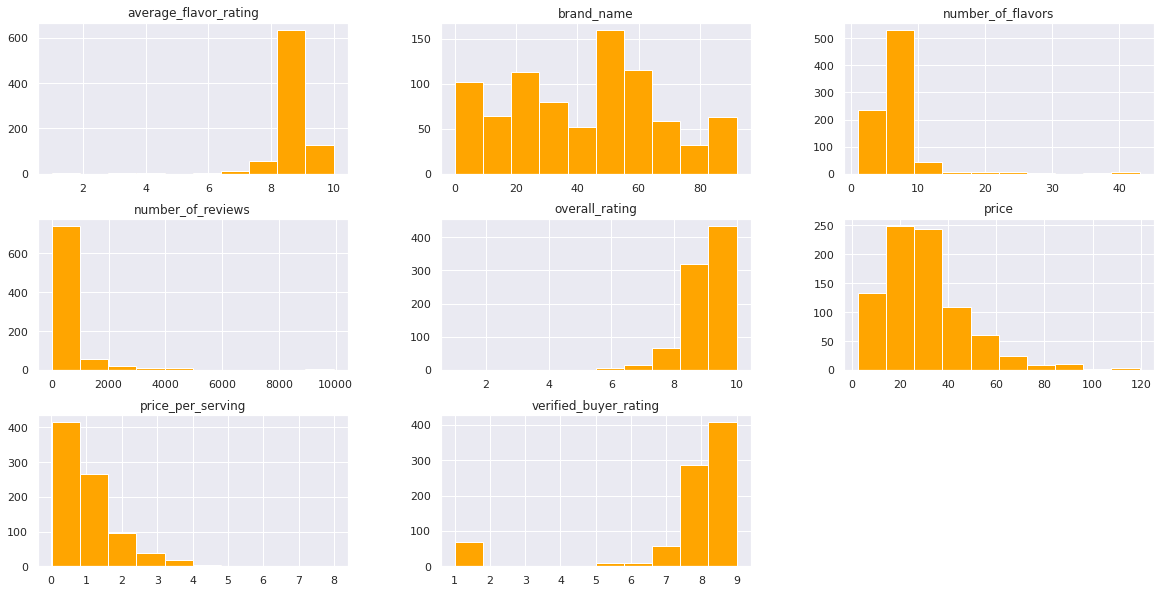

In [402]:
pandas_df.hist(color="orange", figsize=(20, 10))  # Plotted Histogram

# **AutoML**

In [403]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [404]:
df.types  # Datatype of all attributes, here the result ("quality")

{'average_flavor_rating': 'real',
 'brand_name': 'int',
 'link': 'string',
 'number_of_flavors': 'real',
 'number_of_reviews': 'real',
 'overall_rating': 'real',
 'price': 'real',
 'price_per_serving': 'real',
 'product_category': 'enum',
 'product_description': 'enum',
 'product_name': 'enum',
 'top_flavor_rated': 'enum',
 'verified_buyer_number': 'int',
 'verified_buyer_rating': 'int'}

In [405]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [406]:
print(df_train.shape)
print(df_test.shape)

(661, 14)
(179, 14)


In [407]:
df_train.head()

average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
9.1,26,https://sa.bodybuilding.com/store/evlution-nutrition/bcaa-energy.html?skuId=EVL4230288,29,2575,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced from Green Coffee and Green Tea To Support Focus and Recovery*,BCAA Energy,Pink Starblast,1594,9
8.4,62,https://sa.bodybuilding.com/store/opt/whey.html?skuId=OPT302,43,9926,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscle Recovery and Growth*,Gold Standard 100% Whey,Unflavored,3932,9
8.3,36,https://sa.bodybuilding.com/store/jym/pre-jym.html?skuId=JYM4910066,9,3947,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-Hand Picked Ingredients to Support Improved Workouts*,Pre JYM,Raspberry Lemonade,3471,9
8.66615,62,https://sa.bodybuilding.com/store/opt/essential-amino-energy.html?skuId=OPT1900064,6.28871,2466,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural Sources!,Essential AmiN.O. Energy,Unflavored,1,9
8.7,36,https://sa.bodybuilding.com/store/jym/pro-jym.html?skuId=JYM5570006,14,2506,9.2,56.98,1.1,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop with No Added Amino Acids or Filler Nutrients",Pro JYM,S'mores,2275,9
8.66615,51,https://sa.bodybuilding.com/store/muscletech/essential-series-platinum-100-creatine.html?skuId=MT2320202,6.28871,895,9.5,7.55,0.09,Creatine Monohydrate,5g of Micronized Creatine to Support Lean Muscle and Increase Strength*,Platinum 100% Creatine,Unflavored,1,9
8.66615,36,https://sa.bodybuilding.com/store/jym/post-jym.html?skuId=JYM4910043,6.28871,1356,9.5,30.39,1.01,Build Muscle Products,"Powerful Cocktail Designed to Help Boost Repair, Maximize Recovery, and Build Muscle*",Post JYM Active Matrix,Unflavored,1,9
9.1,26,https://sa.bodybuilding.com/store/evlution-nutrition/engn-shred.html?skuId=EVL4860177,6,1275,9.3,34.99,1.17,Betaine Anhydrous,Advanced Pre-Workout + Weight Management,ENGN Shred,Pink Lemonade,658,9
9.3,26,https://sa.bodybuilding.com/store/evlution-nutrition/engn.html?skuId=EVL4040237,12,3414,9.1,29.99,1,Improve Workout Products,"Intense Pre-Workout Powder for Increased Energy, Power, & Focus*",ENGN,Pineapple,1924,9
8.66615,7,https://sa.bodybuilding.com/store/bsn/synth.html?skuId=BSN158,6.28871,3920,9.2,44.99,0.94,Whey Protein,"22g of an Ultra-Premium Blended Protein Formula for Use Anytime, Day or Night",Syntha-6,Unflavored,1,9


In [408]:
X = df.columns
print(X)

['average_flavor_rating', 'brand_name', 'link', 'number_of_flavors', 'number_of_reviews', 'overall_rating', 'price', 'price_per_serving', 'product_category', 'product_description', 'product_name', 'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating']


In [409]:
# Set target and predictor variables
y = "price_per_serving"
X.remove(y)  # Removing the result frm our predictors data
X.remove("link")  # Removing ID from the predictor's data, as it is not related
print(X)

['average_flavor_rating', 'brand_name', 'number_of_flavors', 'number_of_reviews', 'overall_rating', 'price', 'product_category', 'product_description', 'product_name', 'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating']


In [410]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [411]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset

# **Understanding the Parameters**

* Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

* Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

* Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

* Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

* Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

* R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

* Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

* Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

* Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

* Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

* Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

# **Analysing Variance Inflation Factor**

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [412]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = pandas_df[['average_flavor_rating', 'brand_name', 'number_of_flavors', 'number_of_reviews',
       'overall_rating','price','price_per_serving','verified_buyer_rating', ]]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,average_flavor_rating,167.158414
1,brand_name,4.121875
2,number_of_flavors,4.621546
3,number_of_reviews,2.019332
4,overall_rating,173.942150
5,price,4.781823
6,price_per_serving,2.869599
7,verified_buyer_rating,13.754982


The VIF for all the numerical variables is greater than 1 and for average flavor rating, overall rating and verified buyer rating is greater than 10. So the independent variable s highly correlated

**Model Analysis**

In [413]:
print(aml.leaderboard)  
# Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_40937  0.549032  0.301436  0.363808  0.219233                  0.301436
StackedEnsemble_AllModels_3_AutoML_1_20230301_40937     0.558424  0.311837  0.367085  0.222034                  0.311837
StackedEnsemble_AllModels_2_AutoML_1_20230301_40937     0.563316  0.317325  0.375814  0.222738                  0.317325
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_40937  0.566282  0.320675  0.380478  0.226649                  0.320675
StackedEnsemble_AllModels_1_AutoML_1_20230301_40937     0.566539  0.320967  0.380123  0.226186                  0.320967
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_40937  0.566945  0.321427  0.377311  0.223025                  0.321427
XGBoost_grid_1_AutoML_1_20230301_40937_model_10         0.571389  0.326485  0.385554  0.235159                  0.326485
StackedEnsemble_BestOfFamily_1_A

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is



*   StackedEnsemble_BestOfFamily_4_AutoML_1_20230228_202137 with an rmse score of 0.561083

The second best model is 
*   StackedEnsemble_BestOfFamily_3_AutoML_1_20230228_202137 with an rmse score of 0.563492



In [414]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_40937': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20230301_40937': 1,
 'StackedEnsemble_AllModels_2_AutoML_1_20230301_40937': 2,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_40937': 3,
 'StackedEnsemble_AllModels_1_AutoML_1_20230301_40937': 4,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_40937': 5,
 'XGBoost_grid_1_AutoML_1_20230301_40937_model_10': 6,
 'GLM_1_AutoML_1_20230301_40937': 10}

In [415]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

6


In [416]:
best_model.algo

'xgboost'

In [417]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

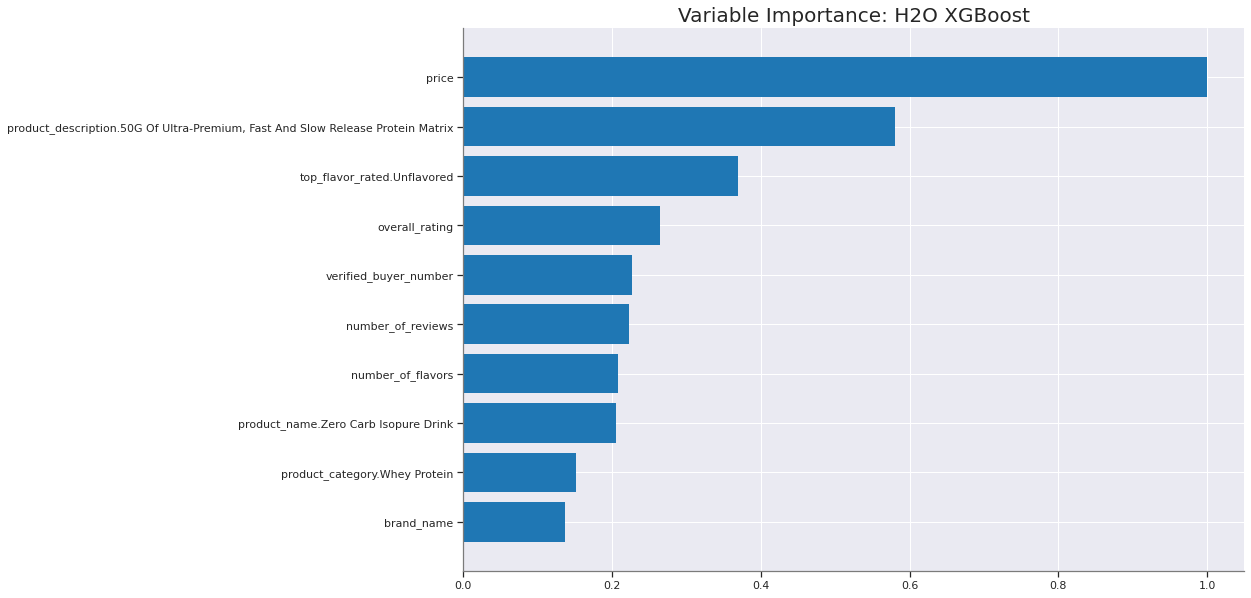

<Figure size 432x288 with 0 Axes>

In [418]:
if best_model.algo in [
    "gbm",
    "glm",
    "xrt",
    "drf",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

* We can Interpret that Price is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)

* Top flavor rated(unflavored) is 0.81 (Think as if it is 81% Important than price )
And So On..

10
glm


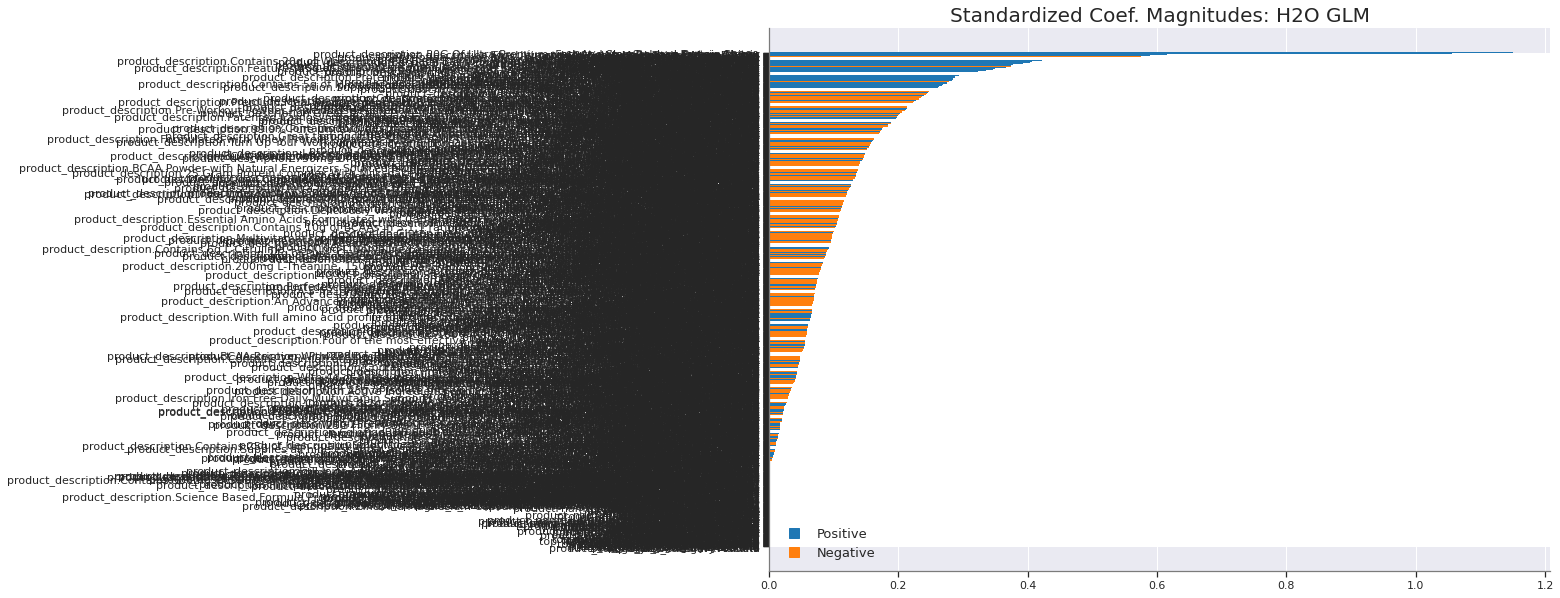

In [419]:
if glm_index != 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [420]:
'''if glm_index != 0:
    print (glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print (glm_model.algo)
    fig, ax = glm_model.std_coef_plot(fig.set_size_inches(12, 8)) #try this line and change values to get the right size
    plt.show()'''

'if glm_index != 0:\n    print (glm_index)\n    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])\n    print (glm_model.algo)\n    fig, ax = glm_model.std_coef_plot(fig.set_size_inches(12, 8)) #try this line and change values to get the right size\n    plt.show()'

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [421]:
print(best_model.rmse(train=True))

0.13075569005296295


In [422]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [423]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.34450752119239625,
 'rmse': 0.5869476307068597,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [424]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [425]:
  # Predictions on Test Dataset using the best model from the leaderboard.
y_pred = h2o.as_list(predictions)
print(y_pred)

      predict
0    0.413939
1    0.672524
2    1.217461
3    0.954351
4    1.174572
..        ...
174  1.155098
175  0.235909
176  1.994577
177  1.746941
178  1.717488

[179 rows x 1 columns]


In [426]:
# Real Answers
y_test = h2o.as_list(df_test[y])
y_test

,price_per_serving
0,0.57
1,0.87
2,1.35
3,1.11
4,1.17
...,...
174,0.26
175,0.13
176,1.89
177,1.17


In [427]:
print(X)

['average_flavor_rating', 'brand_name', 'number_of_flavors', 'number_of_reviews', 'overall_rating', 'price', 'product_category', 'product_description', 'product_name', 'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating']


# **Regularization**

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

* Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

* Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

* Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

* The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.



In [428]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

supplement_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5, remove_collinear_columns = True
)  # Elastic Net Regularization
supplement_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
supplement_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
supplement_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search
supplement_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(
    remove_collinear_columns = True
) #Remove Collinear

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

* The first model, "supplement_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model, the collinearity is also removed in the model.
* The second model, "supplement_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
* This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [429]:
supplement_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,1447,518,1,py_1960_sid_afb5
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.7384416,0.0799694,0.6135196,0.8307341,0.7389554,0.7761911,0.732808
mean_residual_deviance,1.2202905,0.2534204,0.8709196,1.5151727,1.147516,1.1526253,1.4152193
mse,1.2202905,0.2534204,0.8709196,1.5151727,1.147516,1.1526253,1.4152193
null_deviance,96.78658,34.471268,64.91433,136.88814,91.189766,63.110588,127.8301
r2,-0.7927682,0.4630678,-0.5672331,-0.3522790,-0.9837577,-1.5117023,-0.5488689
residual_deviance,161.56342,36.41651,101.02667,180.30556,173.27492,157.90967,195.30026
rmse,1.0997219,0.116738,0.9332307,1.2309235,1.0712217,1.0736039,1.1896299
rmsle,0.6216193,0.0656419,0.5268689,0.6367315,0.6699646,0.6882682,0.5862631


# **Ridge Regularization**

In [430]:
supplement_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 0.02906 ),1451,1225,1,py_1960_sid_afb5
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4692151,0.0501786,0.4702758,0.4061216,0.5322891,0.5011814,0.4362078
mean_residual_deviance,0.4582882,0.1833182,0.4063726,0.3114690,0.7655136,0.4743941,0.3336916
mse,0.4582882,0.1833182,0.4063726,0.3114690,0.7655136,0.4743941,0.3336916
null_deviance,96.2638,28.509132,76.89301,79.18821,142.05855,106.47963,76.699615
r2,0.3789969,0.0699244,0.3341015,0.4706986,0.2886281,0.3978165,0.4037397
residual_deviance,60.47162,23.853771,51.20294,41.11391,100.28228,64.043205,45.71575
rmse,0.6673855,0.1269097,0.6374736,0.5580941,0.8749363,0.6887627,0.5776605
rmsle,0.2724284,0.0207732,0.2759413,0.2435392,0.2997752,0.2794866,0.2633998


The regularization appears to have helped in reducing the cross-validation metrics.

* The mean squared error (Improved by 0.448%),
* root mean squared error (Improved by 0.204%),
* mean absolute error(Improved by 0.250%),

and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# **Lasso Regularization**

In [431]:
supplement_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 0.02906 ),1451,6,2,py_1960_sid_afb5
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.5067052,0.0625933,0.4780217,0.5797037,0.5569263,0.4949998,0.4238744
mean_residual_deviance,0.5429949,0.2339320,0.4047248,0.9286488,0.5575816,0.5029,0.3211193
mse,0.5429949,0.2339320,0.4047248,0.9286488,0.5575816,0.5029,0.3211193
null_deviance,96.27643,33.552036,82.85055,148.92686,105.3375,84.43769,59.82954
r2,0.2647051,0.0542739,0.2757517,0.1705055,0.2899541,0.2782768,0.3090373
residual_deviance,71.685036,30.905603,59.494545,122.58164,74.715935,60.850903,40.782154
rmse,0.7244772,0.1505307,0.6361799,0.9636642,0.7467139,0.7091544,0.5666739
rmsle,0.3012512,0.0267388,0.2963549,0.3348267,0.3179726,0.2926638,0.2644378


# **Which Regularization Method Helps ?**

* The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

* So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

* Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [432]:
lambda_search = supplement_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [433]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677643692632_28


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.005813 )  nlambda = 100, lambda.max = 0.5813, lambda.min = 0.005813, lambda.1se = -1.0  1451                          67                             100                     py_1960_sid_afb5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.3396036646491317
RMSE: 0.5827552356256713
MAE: 0.42187818289572093
RMSLE: 0.2458291104579376
Mean Residual Deviance: 0.3396036646491317
R^2: 0.5326577883118248
Null degrees of freedom: 660
Residual degrees of freedom: 593
Null deviance: 480.3290109878942
Residual deviance: 224.47802233307607
AIC: 1299.9725827345785

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  -------------------  ------------------
     2023-03-01 04:14:29  0.000 sec   1            .58E0     1             0.7266702227633841   0.5
     2023-03-01 04:14:29  0.003 sec   2            .55E0     2             0.7207587795997138   0.5
     2023-03-01 04:14:29  0.009 sec   3            .53E0     2             0.7152065013848511   0.5
     2023-03-01 04:14:29  0.010 sec   4            .51E0     2             0.7099972479045407   0.5
     2023-03-01 04:14:29  0.011 sec   5            .48E0     2             0.7051150099640731   0.5
     2023-03-01 04:14:29  0.014 sec   6            .46E0     2             0.7005439789927121   0.5
     2023-03-01 04:14:29  0.016 sec   7            .44E0     2             0.6962686089897132   0.5
     2023-03-01 04:14:29  0.022 sec   8            .42E0     2             0.6922736709623214   0.5
     2023-03-01 04:14:29  0.023 sec   9            .4E0      2             0.6885443000832578   0.5
     2023-03-01 04:14:29  0.024 sec   10           .38E0     2             0.6850660358598066   0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                  ---
     2023-03-01 04:14:30  0.165 sec   91           .88E-2    42            0.3916115869233059   0.5
     2023-03-01 04:14:30  0.166 sec   92           .84E-2    48            0.385919468835275    0.5
     2023-03-01 04:14:30  0.168 sec   93           .81E-2    50            0.3801437570560681   0.5
     2023-03-01 04:14:30  0.169 sec   94           .77E-2    53            0.37433755309733086  0.5
     2023-03-01 04:14:30  0.171 sec   95           .73E-2    53            0.3685414348262794   0.5
     2023-03-01 04:14:30  0.173 sec   96           .7E-2     56            0.36287355922789594  0.5
     2023-03-01 04:14:30  0.175 sec   97           .67E-2    58            0.3571482932652096   0.5
     2023-03-01 04:14:30  0.176 sec   98           .64E-2    61            0.3514236661699882   0.5
     2023-03-01 04:14:30  0.178 sec   99           .61E-2    66            0.34543527267567087  0.5
     2023-03-01 04:14:30  0.180 sec   100          .58E-2    68            0.33960366905597666  0.5      100           0.5827552356256713  0.3396036646491317   0.42187818289572093  0.5326577883118248
[100 rows x

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.
* Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model.

In [434]:
coeff_table = supplement_glm._model_json["output"]["coefficients_table"]

In [435]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each at

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,0.246912,0.420721,0.586877,0.558218,-0.019046
1,product_description.100% All Natural!,1.329533,0.536313,2.479026,0.014345,1.329533
2,product_description.100% Argentine Beef Liver,0.315843,0.535664,0.589629,0.556377,0.315843
3,product_description.100% Complex Carbohydrates!,0.399855,0.535767,0.746324,0.456706,0.399855
4,product_description.100% Complex Carbs!,0.416983,0.533622,0.781420,0.435856,0.416983
...,...,...,...,...,...,...
1443,number_of_reviews,0.000000,NaN,NaN,NaN,0.000000
1444,overall_rating,0.000000,NaN,NaN,NaN,0.000000
1445,price,-0.008616,0.001765,-4.880410,0.000003,-0.148635
1446,verified_buyer_number,0.000000,NaN,NaN,NaN,0.000000


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_40937,0.544053,0.295993,0.365677,0.219793,0.295993,205,0.127126,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_40937,0.546449,0.298607,0.367384,0.224766,0.298607,307,0.287374,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_40937,0.550715,0.303287,0.378282,0.225506,0.303287,280,0.105415,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_40937,0.554543,0.307518,0.367345,0.229688,0.307518,252,0.077993,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_40937,0.555736,0.308843,0.36742,0.231167,0.308843,166,0.059069,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_40937,0.556383,0.309562,0.368809,0.233112,0.309562,302,0.04836,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230301_40937,0.559099,0.312592,0.370772,0.226366,0.312592,359,0.290607,StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_40937_model_8,0.569243,0.324037,0.387433,0.231373,0.324037,474,0.054168,XGBoost
XGBoost_grid_1_AutoML_1_20230301_40937_model_10,0.586948,0.344508,0.392121,0.238274,0.344508,491,0.022169,XGBoost
XGBoost_3_AutoML_1_20230301_40937,0.599668,0.359601,0.412401,0.243922,0.359601,255,0.011992,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

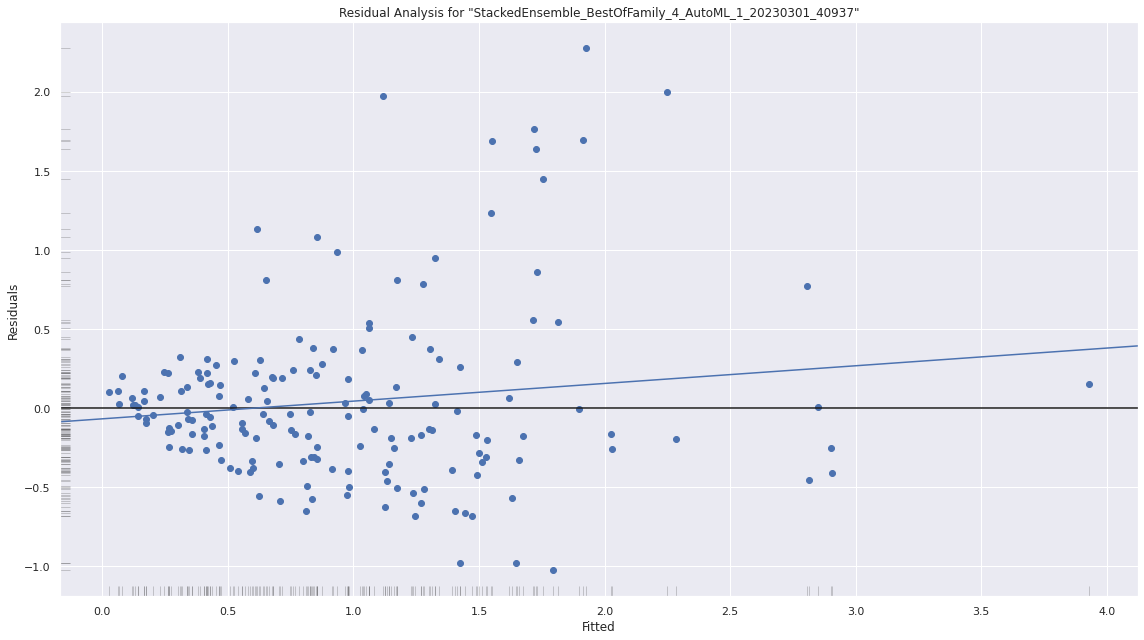

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

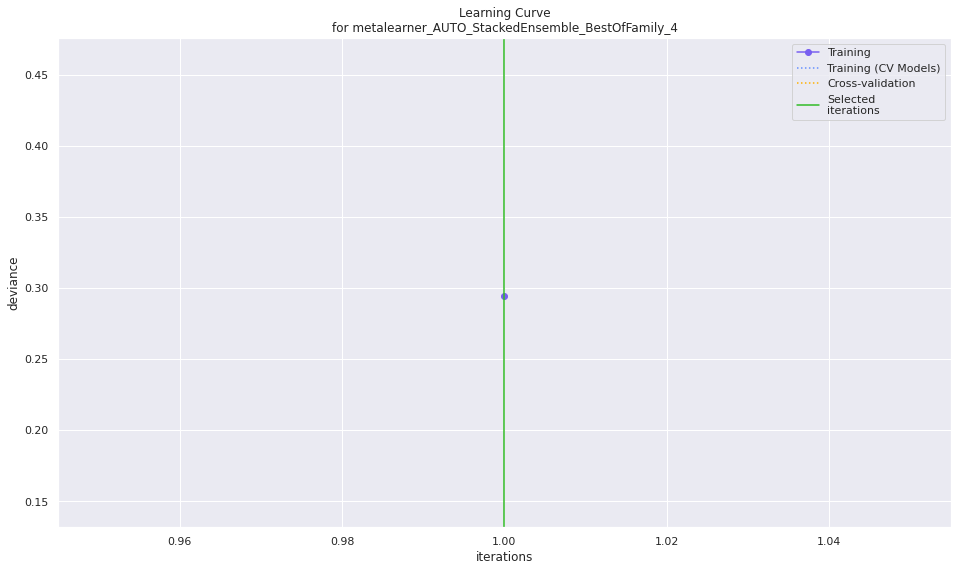

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

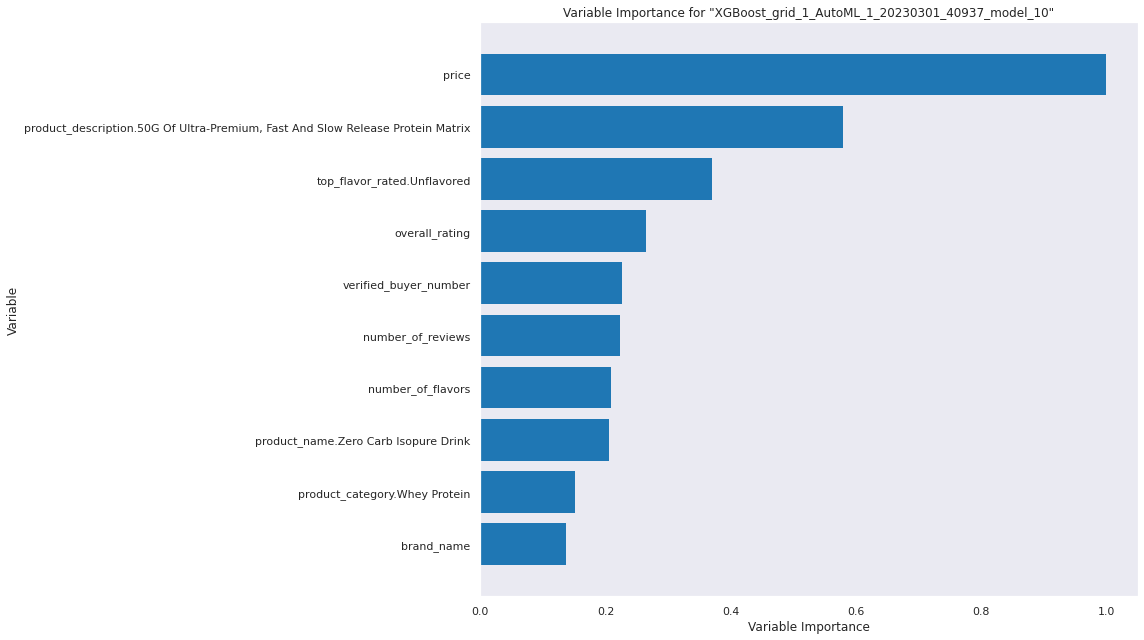

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

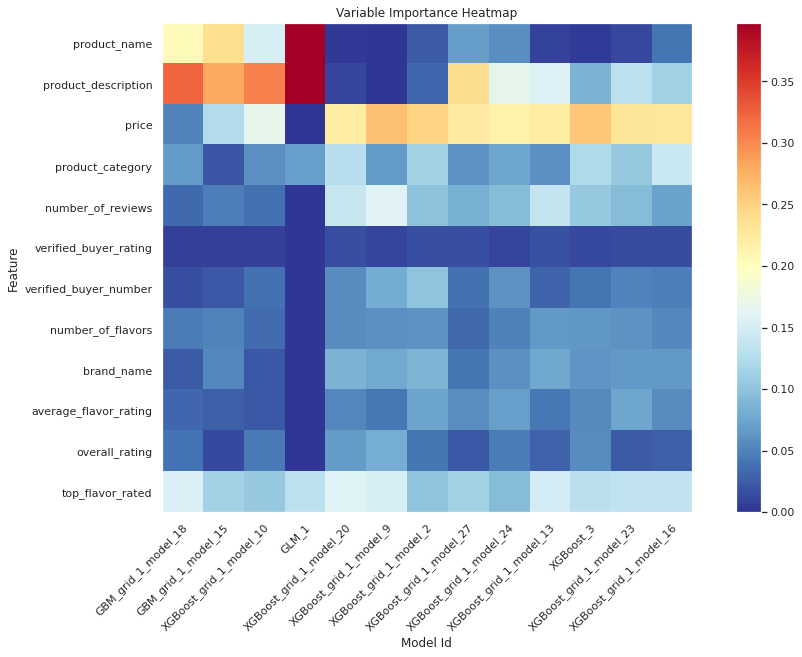

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

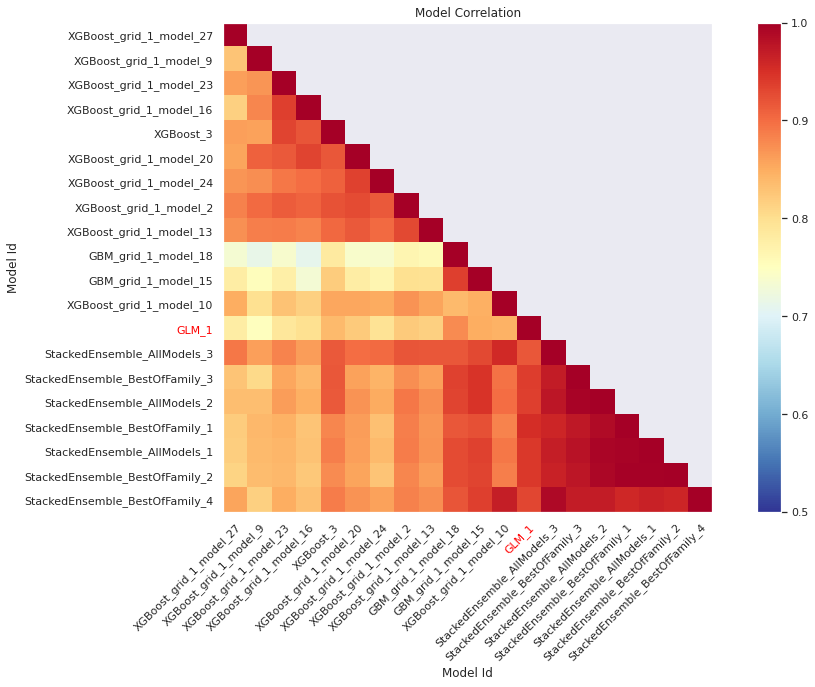

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

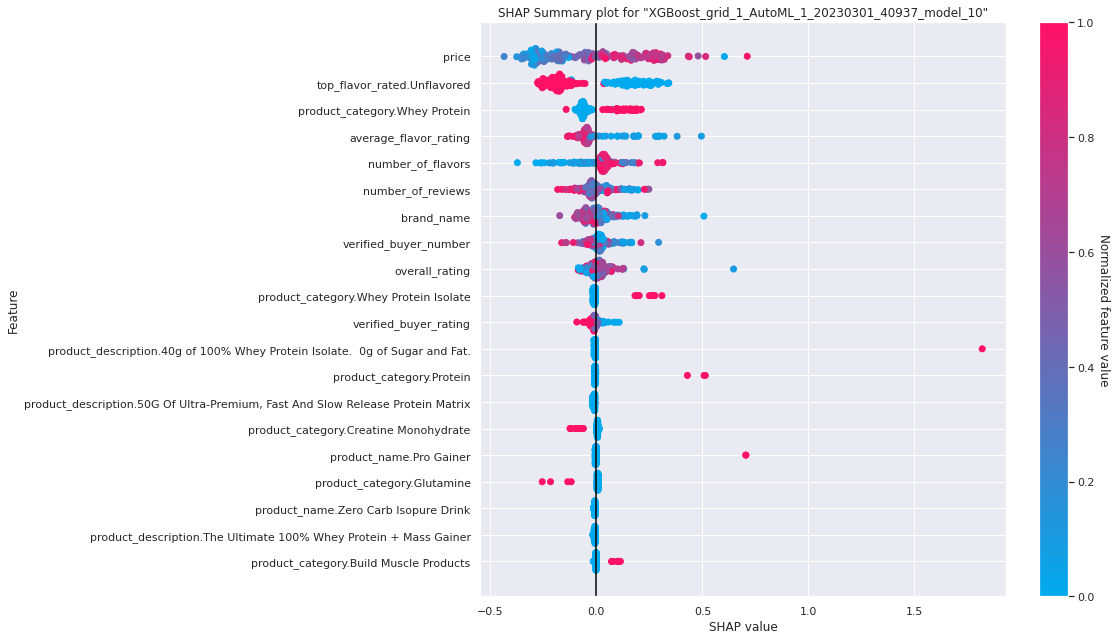

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

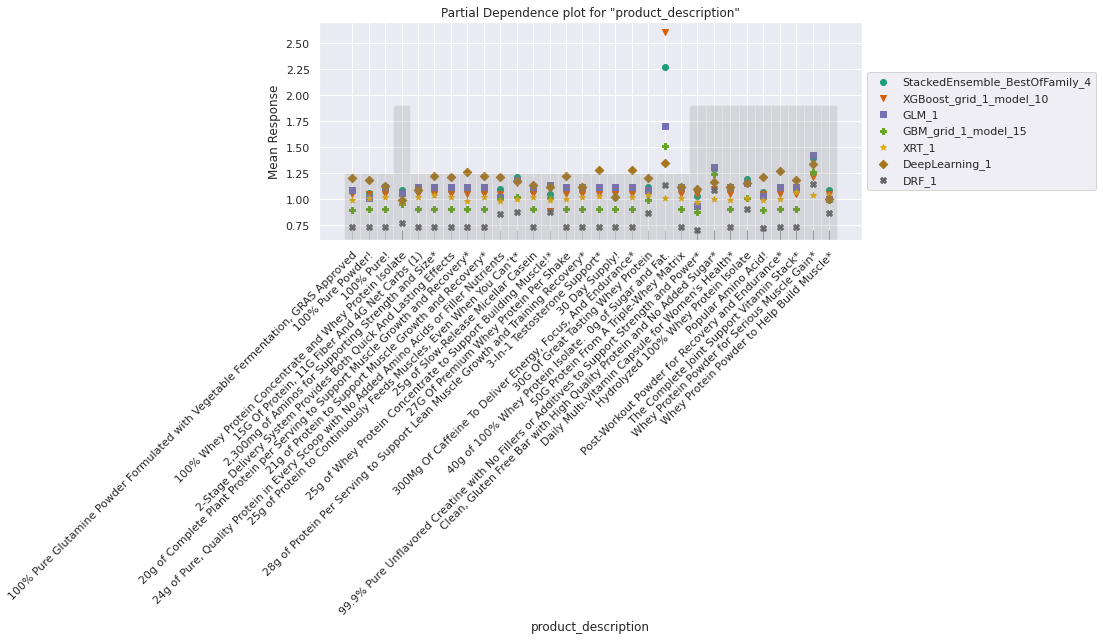

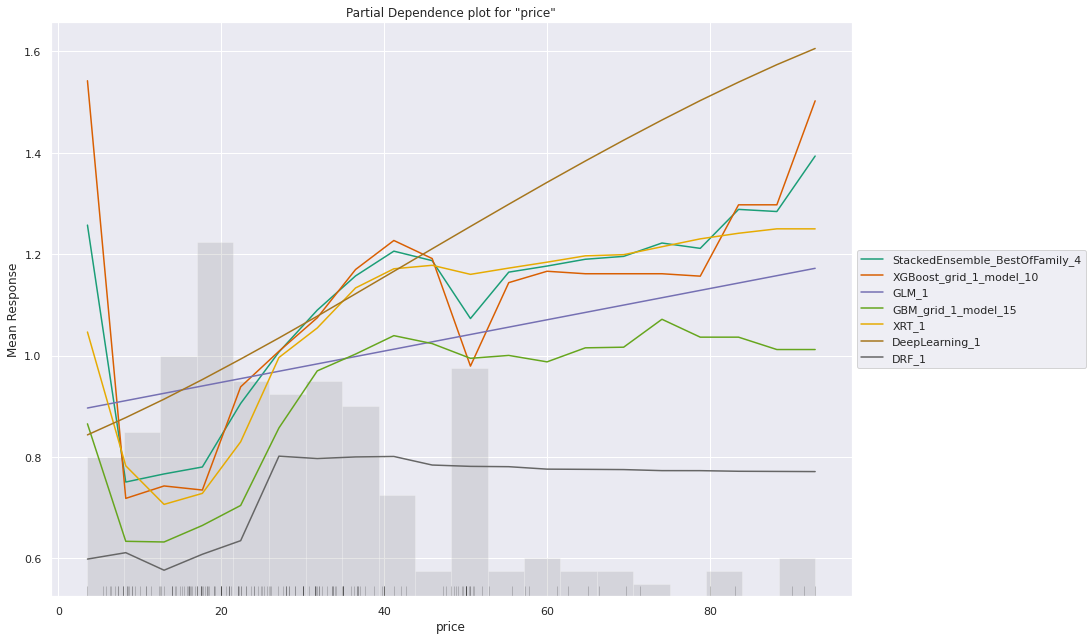

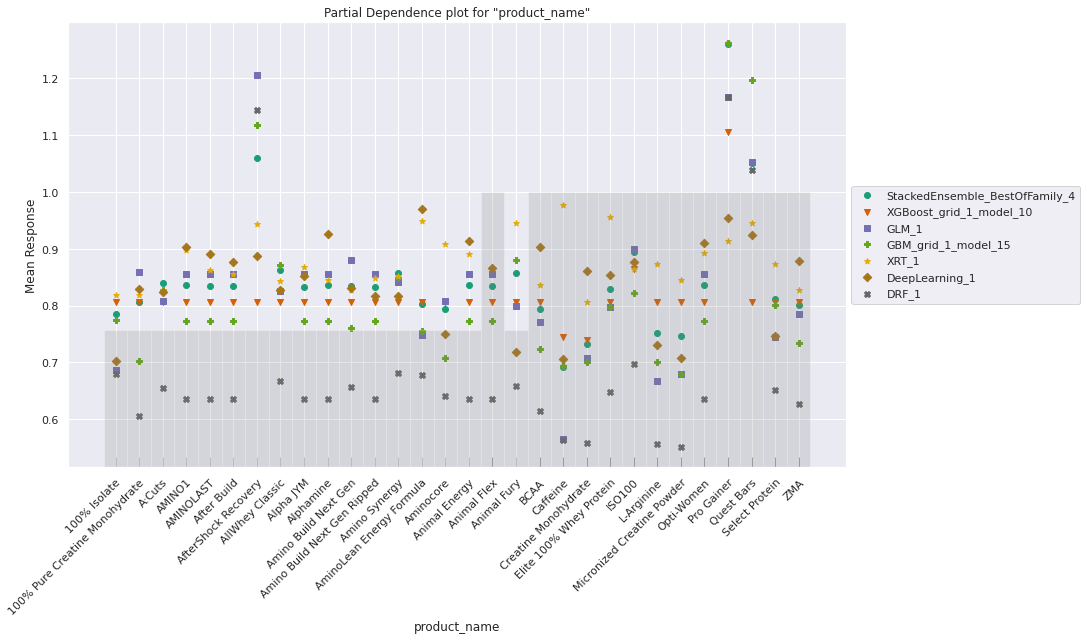

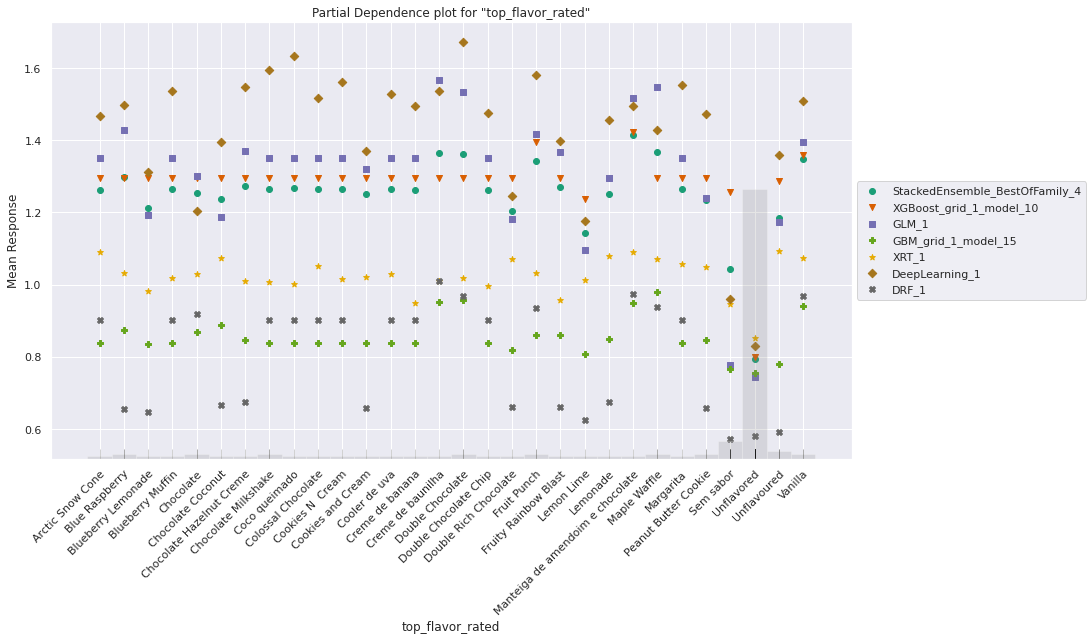

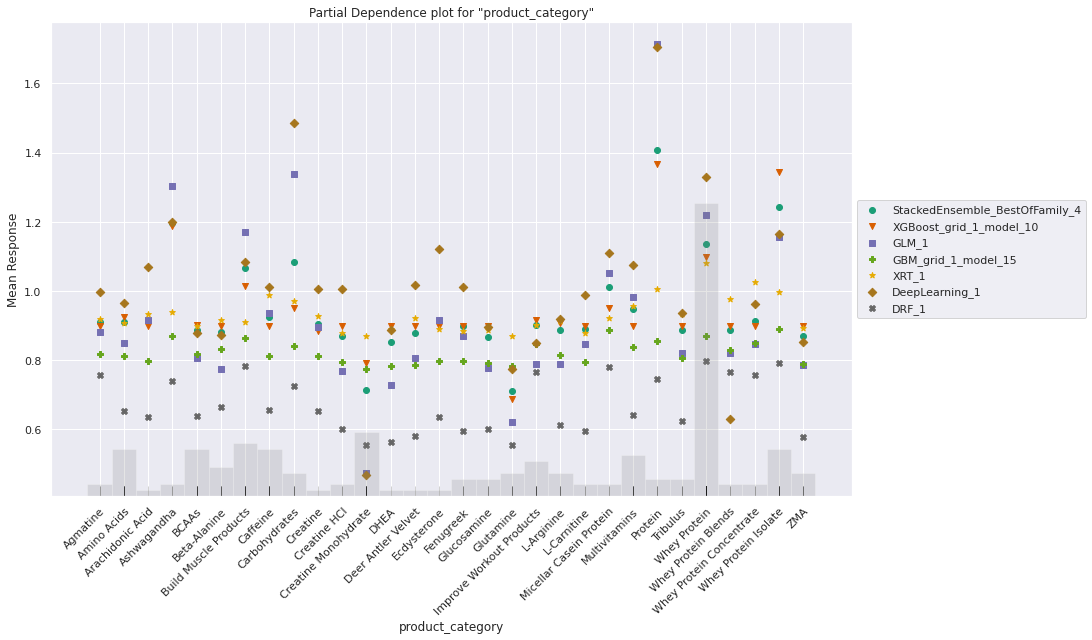

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

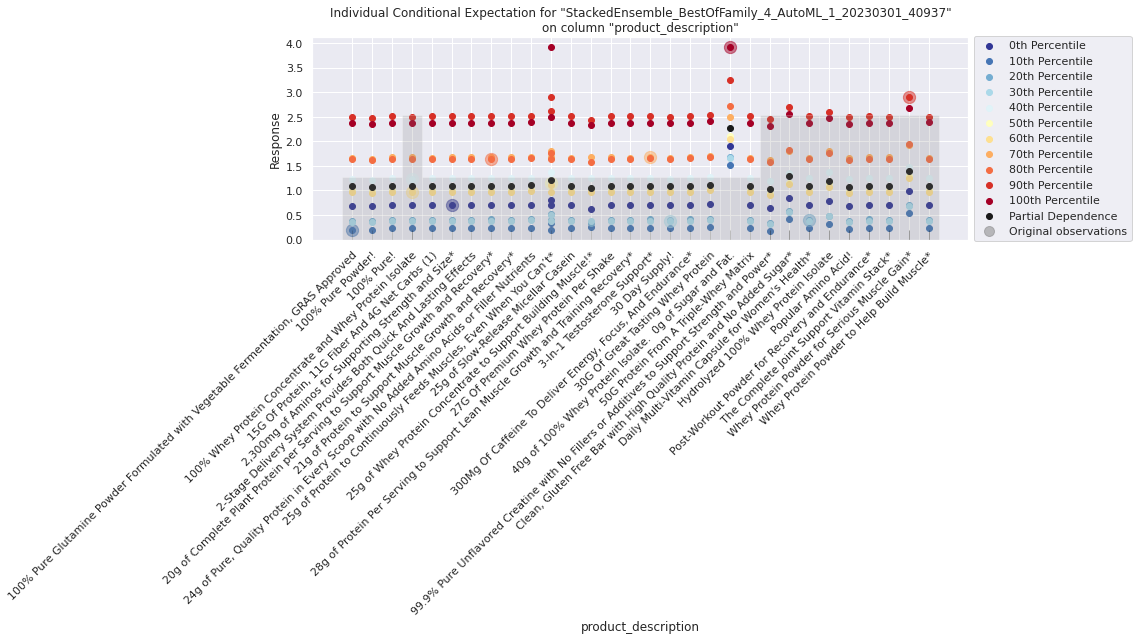

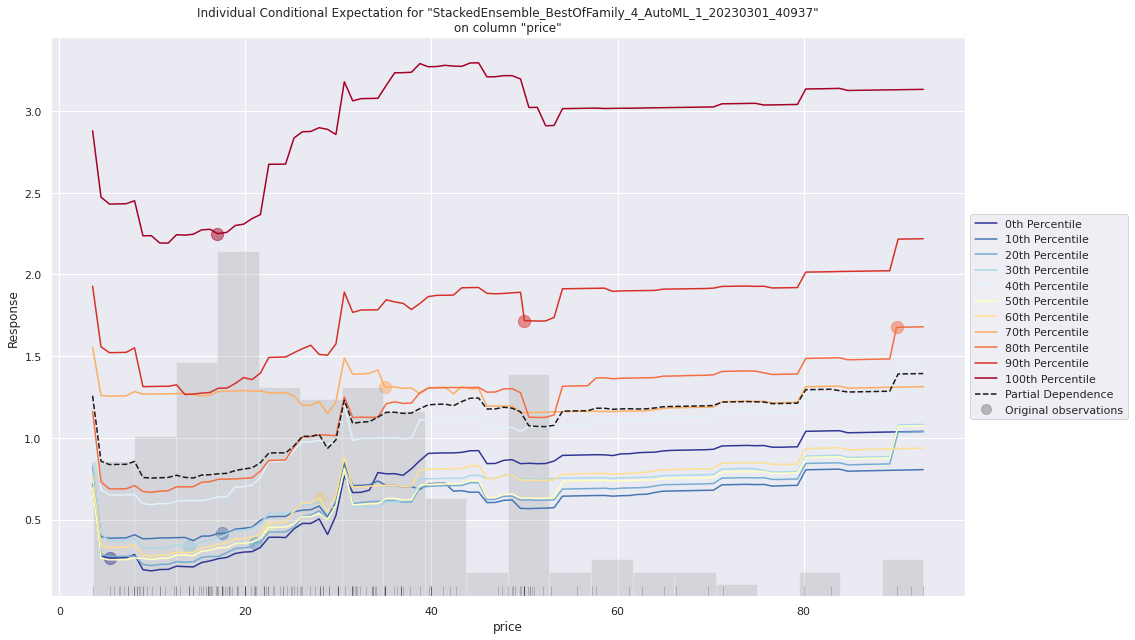

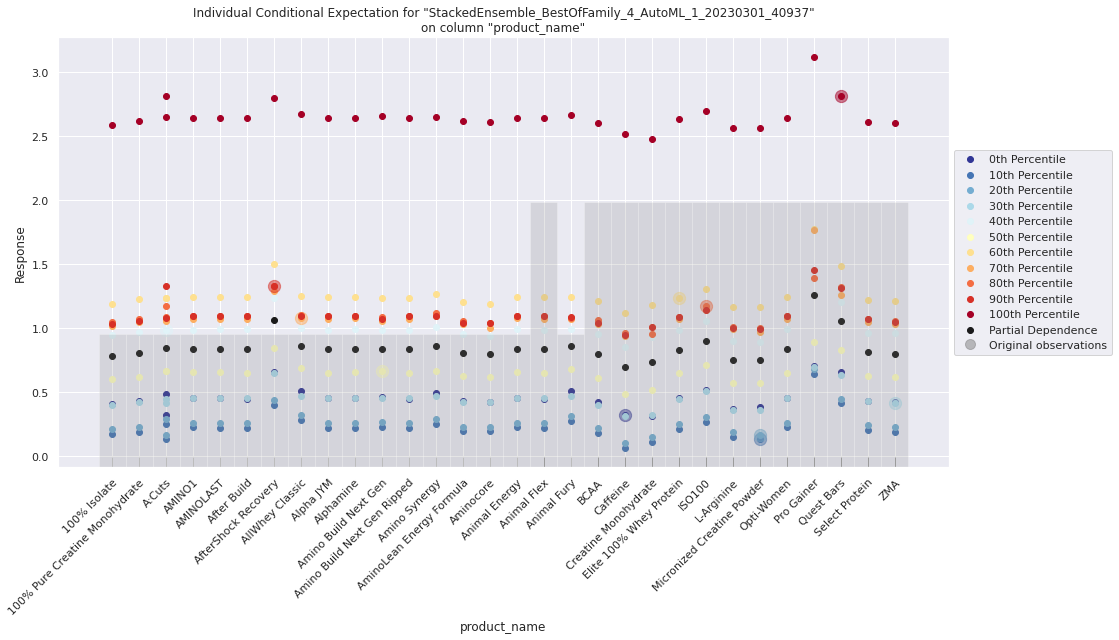

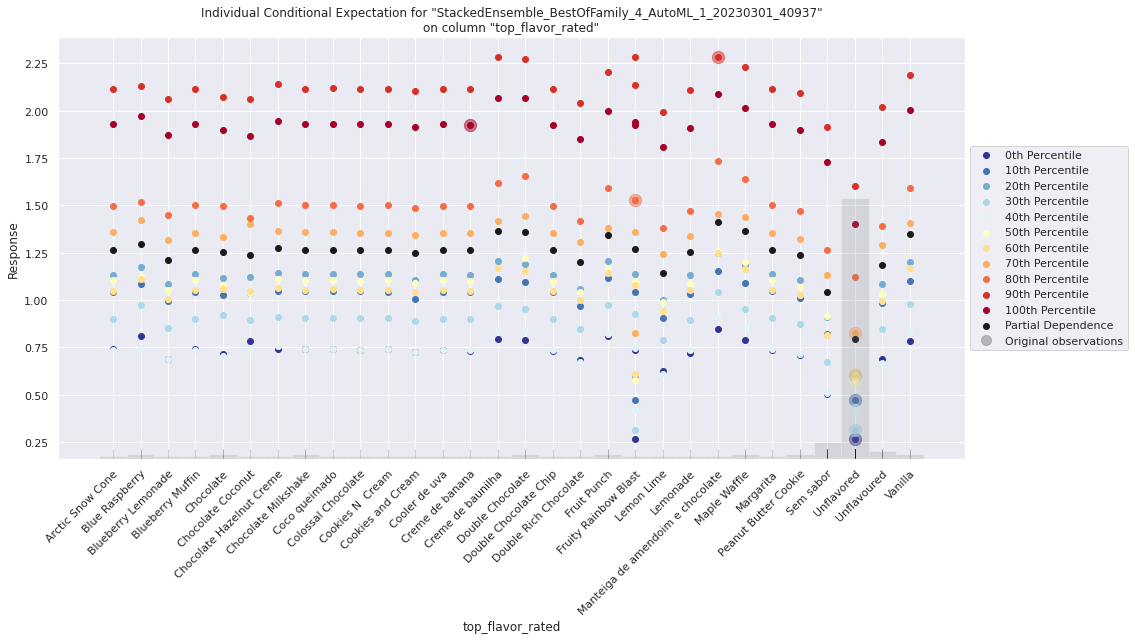

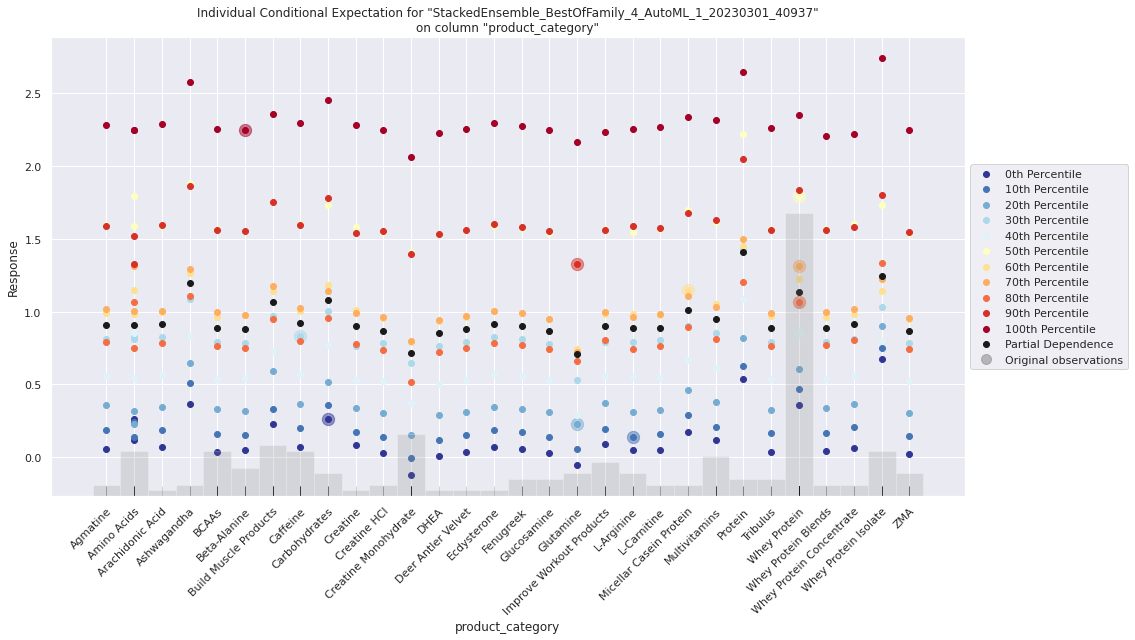

In [436]:
exa = aml.explain(df_test)

# **Interpreting Best Model from AutoML**

# **Residual Analysis**

* Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.

# **SHAP Summary**
From the SHAP summary diagram, we can interpret a few conclusions -

1. All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.

2. The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine.
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

# **Partial Dependence Plot (PDP)**

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate.

As we can see that when the rest of the variables are kept constant and a
marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine. 2. Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

#**ICE (Individual Conditional Expectation) Plot**

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the alcohol and sulfate features, as we interpreted in PDP the quality of wine increases when alcohol and sulfate value is between 11 to 12 and 0.4 to 0.8 respectively. But is this true for every wine in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few wines(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

In [437]:
import statsmodels.formula.api as smf  # OLS model Library

In [438]:
import h2o

pandas_df = h2o.as_list(df)

In [439]:
results = smf.ols("price_per_serving ~ average_flavor_rating + brand_name + number_of_flavors + number_of_reviews + overall_rating + price + verified_buyer_rating",
                  data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_per_serving   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     22.22
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.19e-27
Time:                        04:21:36   Log-Likelihood:                -995.04
No. Observations:                 840   AIC:                             2006.
Df Residuals:                     832   BIC:                             2044.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1437      0.438      2.611      0.009       0.284       2.003
average_flavor_rating    -0.0711      0.049     -1.438      0.151      -0.168       0.026
brand_name               -0.0017      0.001     -1.491      0.136      -0.004       0.001
number_of_flavors         0.0075      0.008      1.003      0.316      -0.007       0.022
number_of_reviews     -5.807e-05   3.22e-05     -1.802      0.072      -0.000    5.18e-06
overall_rating            0.0122      0.044      0.278      0.781      -0.074       0.098
price                     0.0188      0.002     11.667      0.000       0.016       0.022
verified_buyer_rating    -0.0152      0.013     -1.179      0.239      -0.041       0.010
==============================================================================
Omnibus:                      462.046   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4969.571
Skew:                           2.281   Prob(JB):                         0.00
Kurtosis:                      14.008   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Hyperparameter Tuning**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

Hyperparameter Tuning - Random Grid Search on GBM Model

In [440]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [441]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [442]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [443]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [444]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,0.4424905
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,0.4465493
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.4578217
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.4673506
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.4737698
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.4769179
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.5052210
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.5198131
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.5230940
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.5243321


In [445]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [446]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,0.4424905
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,0.4465493
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.4578217
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.4673506
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.4737698
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.4769179
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.5052210
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.5198131
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.5230940
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.5243321


In [447]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [448]:
models = gbm_gridperf2.models

In [449]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [450]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [451]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [452]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.1        0.07          7          0.8           0.442491
1               0.1        0.06          8          0.9           0.446549
2               0.1        0.08          3          0.8           0.457822
3               0.2        0.04          5          0.9           0.467351
4               0.1        0.02          9          0.8           0.473770
5               0.2        0.02         10          0.5           0.476918
6               0.4        0.08          6          0.9           0.505221
7               0.3        0.03          8          1.0           0.519813
8               0.3        0.02          2          1.0           0.523094
9               0.5        0.05          2          0.8           0.524332
10              0.5        0.10          4          0.8           0.528642
11              0.6        0.09          3          0.8           0.539322
12              0.5      

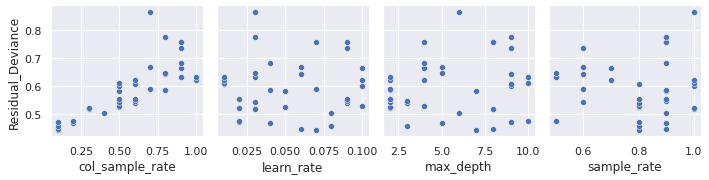

In [453]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

In [454]:
h2o.cluster().shutdown()

H2O session _sid_afb5 closed.


# **Hyperparameter Tuning Analysis**


* This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

* Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.1, learn_rate of 0.07, max_depth of 7, and sample_rate of 0.8, with a Residual Deviance of 0.442. The next best models had Residual Deviances in the range of 0.446-0.476, while the worst-performing models had Residual Deviances above 0.505.

* Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.

# **Conclusion**

* Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.
* Studied the effects of Ridge and LASSO regularization on the GLM Model.
* Studied the importance of variable using SHAP summary.
* Performed the hyperparameter tuning using Random Grid Search Method.

# **Assignment Question/Answers**

**Q1) Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than 0.05. P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘number_of_flavors’,'overall_rating'and ‘verified_buyer_rating’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

**Q2) Are any model assumptions violated?**

Assumptions for linear regression are:
Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables.
No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.927, therefore this assumption is not violated.

**Q3) Is there any multicollinearity in the model?**

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between Number of reviews and verified buyer rating

**Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Number of reviews and verified buyer rating and Number of flavors and verfied buyer number are highly correlated to each other. Other than those other predictors are independent from each other.

**Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
From the variable importance plot, the most to least important variables are displayed. For my model price, number of reviews,verified buyer rating, number of flavors are top 4 most important variables to determine Price per serving.

**Q6) Does the model make sense?**
For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.50 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

**Q7)Does regularization help?**

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were different in both the cases. Hence it can be concluded that for this model regularization helped.

**Q8) Which independent variables are significant?**

Variables are significant when p-value is less than 0.05. For this model except for 'link', product_description','number_of flavors', 'overall_rating',  all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

**Q9) Which hyperparameters are important?**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using Randon Grid Search. The best hyperparameters for this model are:- 'col_sample_rate':0.1,'learn_rate':0.07 'max_depth': 0.7, 'sample_rate': 8 and 'Residual_Deviance': 0.442

**Q10) Coding professionalism?**

Yes, I have followed the coding professionalism


References:

* https://openai.com/blog/chatgpt

*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

*  https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb  

*   https://www.youtube.com/watch?v=91QljBnvM7s&t=67s





MIT License

**Copyright (c) 2023 Sameer Sanjay Nimse and AISkunks**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.